# Loans Data Exploration
**Welcome** to the dataset exploration project! The project will explore `Loans dataset` contains 113,937 loans since 2005/2014 with 81 variables on each loan, including loan amount, current loan status, borrower income, borrower occupation, and many others.

## Table of Contents
<ul>
<li><a href="#pre">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#con">Conclusion</a></li>
</ul> 

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.shape

(113937, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

<a id='pre'></a>
## Preliminary Wrangling

The section contains selecting the interest columns from the dataset and doing simple wrangling.

In [6]:
df_loan = df[['ListingNumber','ListingCreationDate','Term','LoanStatus','ClosedDate','ListingCategory (numeric)','BorrowerState',
              'Occupation','EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','IncomeRange','IncomeVerifiable',
              'StatedMonthlyIncome','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments',
              'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate', 'LoanOriginalAmount']].copy()

In [7]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingNumber                        113937 non-null  int64  
 1   ListingCreationDate                  113937 non-null  object 
 2   Term                                 113937 non-null  int64  
 3   LoanStatus                           113937 non-null  object 
 4   ClosedDate                           55089 non-null   object 
 5   ListingCategory (numeric)            113937 non-null  int64  
 6   BorrowerState                        108422 non-null  object 
 7   Occupation                           110349 non-null  object 
 8   EmploymentStatus                     111682 non-null  object 
 9   EmploymentStatusDuration             106312 non-null  float64
 10  IsBorrowerHomeowner                  113937 non-null  bool   
 11  IncomeRange  

>rename category col.

In [8]:
# rename column
df_loan.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True) 

In [9]:
# take a look about duration loans dataset
df_loan.ListingCreationDate.describe()

count                            113937
unique                           113064
top       2013-10-02 17:20:16.550000000
freq                                  6
Name: ListingCreationDate, dtype: object

In [10]:
# display sampling of values
df_loan.sample(8)

,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,LoanOriginalAmount
87888,632613,2012-09-03 11:55:14.637000000,36,Current,NaN,1,NJ,Clerical,Employed,13.0,True,"$75,000-99,999",True,6666.666667,NaN,NaN,NaN,NaN,NaN,15000
113673,613622,2012-07-18 09:36:17.583000000,60,Current,NaN,1,TX,Professional,Employed,113.0,False,"$50,000-74,999",True,5000.000000,NaN,NaN,NaN,NaN,NaN,8000
38531,417923,2009-07-23 20:06:31.500000000,36,Completed,2011-12-07 00:00:00,1,CA,Sales - Commission,Full-time,20.0,False,"$25,000-49,999",True,2333.333333,1.0,14.0,14.0,0.0,0.0,2100
45876,990877,2013-11-12 17:54:16.297000000,36,Current,NaN,1,MI,Computer Programmer,Employed,44.0,False,"$75,000-99,999",True,6694.583333,1.0,2.0,2.0,0.0,0.0,15000
2523,1212905,2014-02-27 13:57:18.370000000,36,Current,NaN,1,IL,Other,Other,461.0,False,"$1-24,999",True,1476.333333,3.0,36.0,36.0,0.0,0.0,4000
54950,1165790,2014-01-26 15:58:43.463000000,36,Current,NaN,1,CO,Retail Management,Employed,20.0,False,"$1-24,999",True,1833.333333,NaN,NaN,NaN,NaN,NaN,3000
96848,902720,2013-09-13 12:22:20.620000000,36,Current,NaN,1,MO,NaN,Other,62.0,True,"$50,000-74,999",True,5250.000000,NaN,NaN,NaN,NaN,NaN,4000
82103,1135094,2014-01-15 11:43:00.200000000,36,Current,NaN,1,MT,Sales - Commission,Self-employed,43.0,False,"$100,000+",False,10000.000000,NaN,NaN,NaN,NaN,NaN,12000


In [11]:
# convert to appropriate type
df_loan.ListingCreationDate = pd.to_datetime(df_loan.ListingCreationDate)

In [12]:
# check if contains duplicate
df_loan.duplicated().sum()

871

In [13]:
# drop duplicates rows
df_loan.drop_duplicates(inplace = True)

In [14]:
# display borrowers jobs
df_loan.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [15]:
# take a look about income range and monthly paid
df_loan.loc[:,['IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome']]

,IncomeRange,IncomeVerifiable,StatedMonthlyIncome
0,"$25,000-49,999",True,3083.333333
1,"$50,000-74,999",True,6125.000000
2,Not displayed,True,2083.333333
3,"$25,000-49,999",True,2875.000000
4,"$100,000+",True,9583.333333
...,...,...,...
113932,"$50,000-74,999",True,4333.333333
113933,"$75,000-99,999",True,8041.666667
113934,"$25,000-49,999",True,2875.000000
113935,"$25,000-49,999",True,3875.000000


In [16]:
# check if contains null
df_loan.isna().sum() # write this line or remove it?? 

ListingNumber                              0
ListingCreationDate                        0
Term                                       0
LoanStatus                                 0
ClosedDate                             57990
ListingCategory                            0
BorrowerState                           5515
Occupation                              3529
EmploymentStatus                        2255
EmploymentStatusDuration                7625
IsBorrowerHomeowner                        0
IncomeRange                                0
IncomeVerifiable                           0
StatedMonthlyIncome                        0
TotalProsperLoans                      91143
TotalProsperPaymentsBilled             91143
OnTimeProsperPayments                  91143
ProsperPaymentsLessThanOneMonthLate    91143
ProsperPaymentsOneMonthPlusLate        91143
LoanOriginalAmount                         0
dtype: int64

> the last columns for they have prosper loans

In [17]:
# create new dataset for borrower they have prosper loan
df_prosloan = df_loan[['ListingNumber','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments',
                      'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate']].copy()

# drop col
df_loan.drop(['TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments',
                      'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate'], axis=1, inplace=True)

In [18]:
# display how much a borrower have loans ???
df_prosloan.TotalProsperLoans.unique()

array([nan,  1.,  3.,  2.,  4.,  6.,  5.,  8.,  7.,  0.])

In [19]:
# list of late paid from previous loans
df_prosloan.loc[(df_prosloan.TotalProsperLoans > 1.0) & (df_prosloan.TotalProsperPaymentsBilled != df_prosloan.OnTimeProsperPayments),['TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate'] ]

,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate
343,2.0,36.0,27.0,9.0,0.0
476,2.0,65.0,61.0,4.0,0.0
551,2.0,50.0,48.0,2.0,0.0
601,2.0,20.0,18.0,2.0,0.0
603,2.0,51.0,50.0,1.0,0.0
...,...,...,...,...,...
113689,2.0,42.0,35.0,7.0,0.0
113754,2.0,57.0,56.0,1.0,0.0
113802,4.0,60.0,55.0,5.0,0.0
113813,3.0,64.0,48.0,12.0,4.0


> 1600 cases have payment late, and may they causing risks.

**What is the structure of your dataset?** <br>
The dataset contains 113,937 loans since 2005/2014 with 81 variables on each loan, including loan amount, current loan status, borrower income, borrower occupation, and many others. <br>
It's contains qualititave varibles such as loan status, loan category, borrower state and occupation and others. Also, it's contains quantitave variables such as loan amount, term, borrower income and others.

**What is/are the main feature(s) of interest in your dataset?** <br>
I'm interesting to investigate what factors affect a loan’s outcome status.

**What features in the dataset do you think will help support your investigation into your feature(s) of interest?** <br>
I'll investigating about difference columns (borrower income, occupation, state, etc.) and then exploaring if they affect of the loan's status, if they, i'll sorted them odrinally.


<a id='uni'></a>
## Univariate Exploration

The section contains univariate exploration of the dataset columns. Let's start with some qualitative variables followed by some quantitative variables .

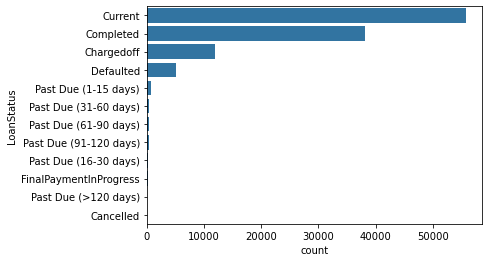

In [20]:
# display loan status
base_color = sb.color_palette()[0]
st_order = df_loan['LoanStatus'].value_counts().index
sb.countplot(data = df_loan, y = 'LoanStatus', color = base_color, order = st_order);

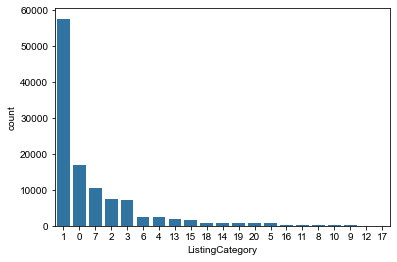

In [21]:
# sort loan category listing
cat_order = df_loan['ListingCategory'].value_counts().index
sb.countplot(data = df_loan, x = 'ListingCategory', color = base_color, order = cat_order);
# change the figure size
sb.set(rc={'figure.figsize':(15,10)});

> The category of the listing that the borrower selected when posting their listing:<br> 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

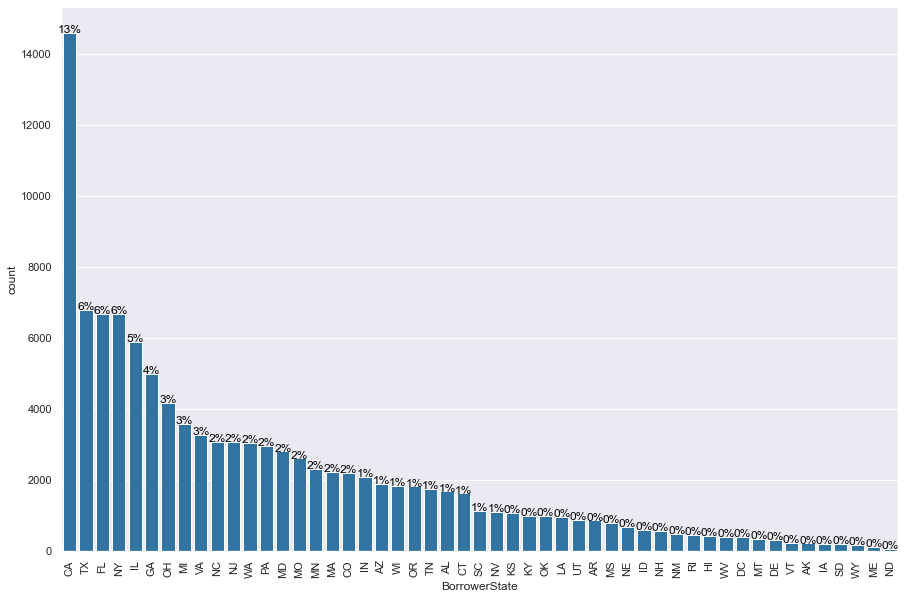

In [22]:
# display the percentage of borrower state
n_state = df_loan['BorrowerState'].value_counts().sum()
state_order = df_loan['BorrowerState'].value_counts().index
sb.countplot(data=df_loan, x='BorrowerState', color=base_color, order=state_order);

max_state = df_loan['BorrowerState'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = max_state[label.get_text()]
    pct_string = '{:d}%'.format(int(100*count/n_state))

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

# change the figure size
sb.set(rc={'figure.figsize':(15,10)});

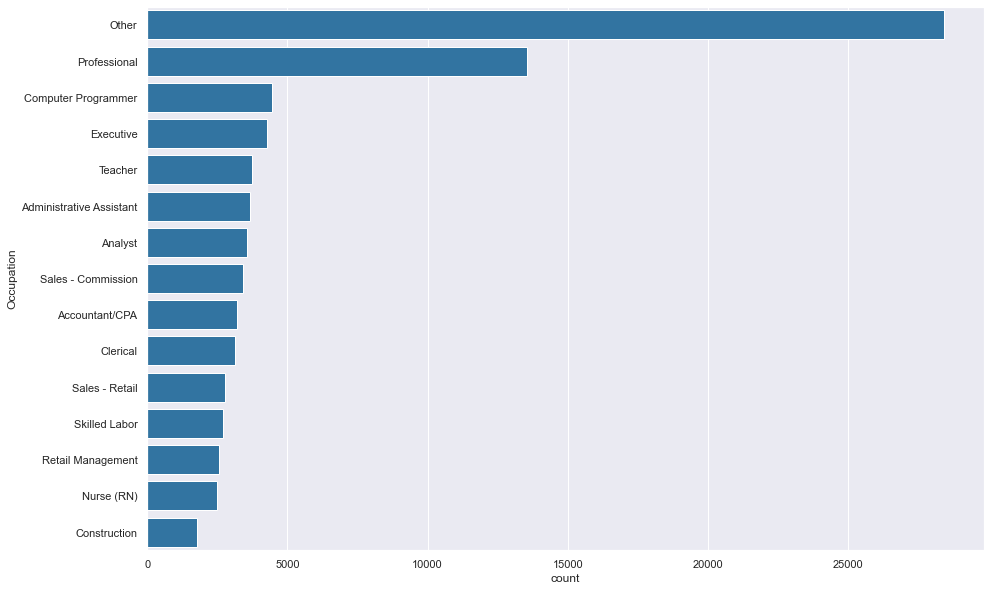

In [23]:
# display top borrower occupation
oc_order = df_loan['Occupation'].value_counts().nlargest(15).index
sb.countplot(data = df_loan, y = 'Occupation', color = base_color, order = oc_order);

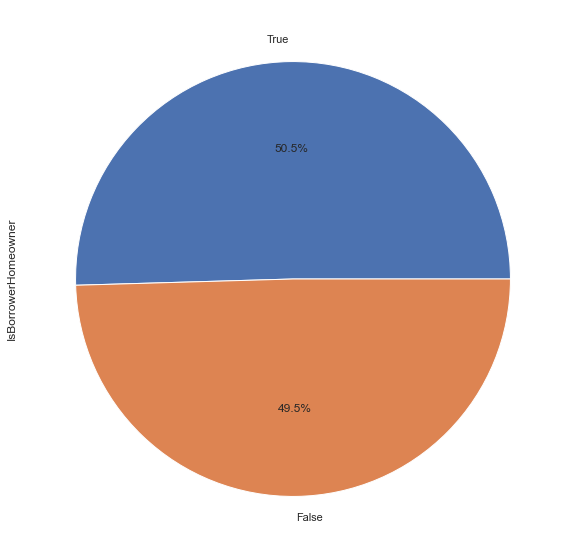

In [24]:
# is the borrower own a home?
df_loan.IsBorrowerHomeowner.value_counts().plot(kind = 'pie', autopct= '%1.1f%%');

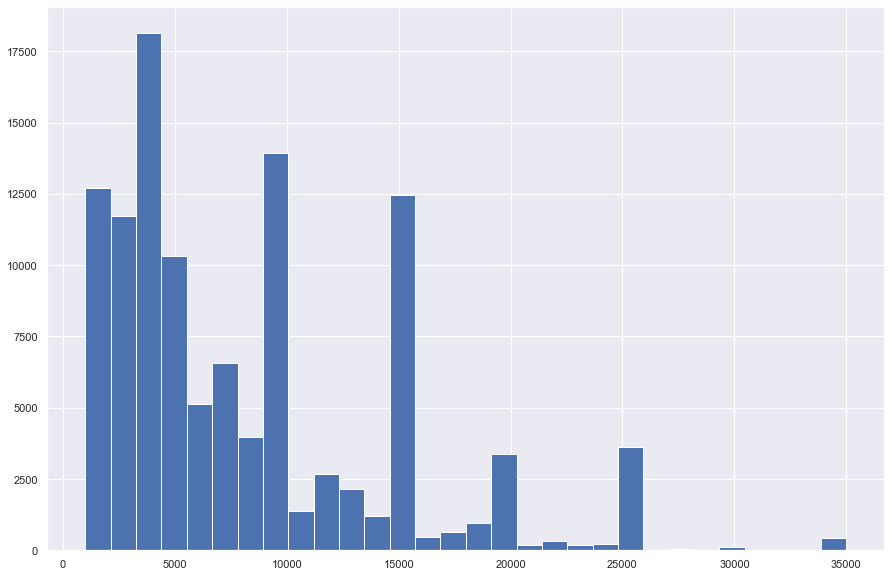

In [25]:
# display loans amount
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = 30);

> non-uniform distribution/ right skewed of data points in different bins??

In [26]:
df_loan.LoanOriginalAmount.describe()

count    113066.000000
mean       8314.762307
std        6237.007841
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

**Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?** <br>
The loan amount variable divided defualted into only ten bins that is too few to understand the distribution of the data, so I divided it to 20, 30 bins, respecivelly, to understand the ditribution. In both, the figure is right skewed distribution (positive).

**Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?** <br>
After investigating the dataset and selecting the interset columns, there are some columns depending on previous loans for a borrower which is contains a huge of nan, regarding to not all borrowers have previous loans. So, for tidiness, I breaking these columns with the key id to a new dataset for borrower they have previous loan.

<a id='bi'></a>
## Bivariate Exploration

The section contains bivariate exploration of dataset to look the relationship and correlation between two variables. There are showing two cases, quantitative vs. quantitative variables useing scatter plot for exploring the relation between loan amount and borrower income. Additionally, quantitative vs. qualitative variables using violin plot for exploring the relation between borrower they are losing thier occupation before completing loan payments and loan status.

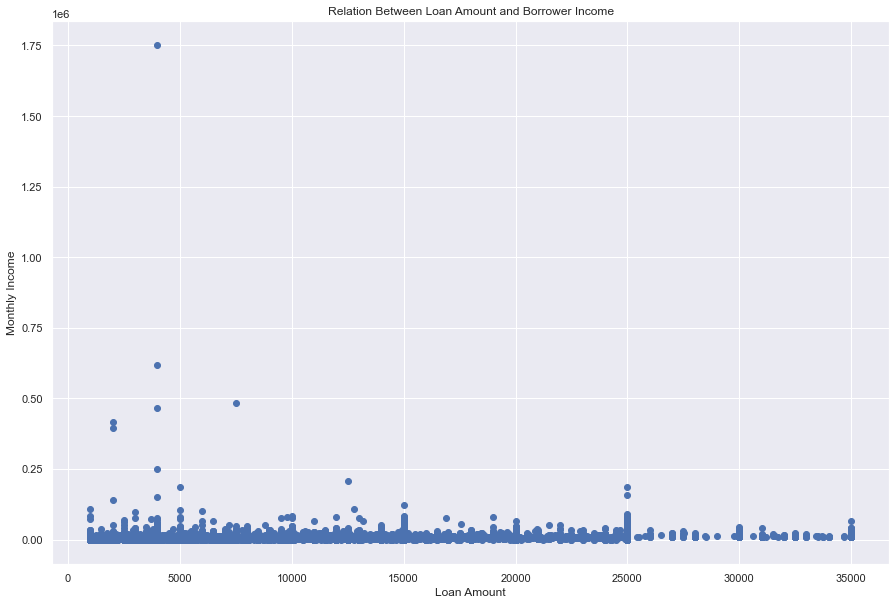

In [27]:
# relation between loan amount and borrower income
plt.scatter(data = df_loan, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome')
plt.title('Relation Between Loan Amount and Borrower Income')
plt.xlabel('Loan Amount')
plt.ylabel('Monthly Income');

> The visualization showing overplotting where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

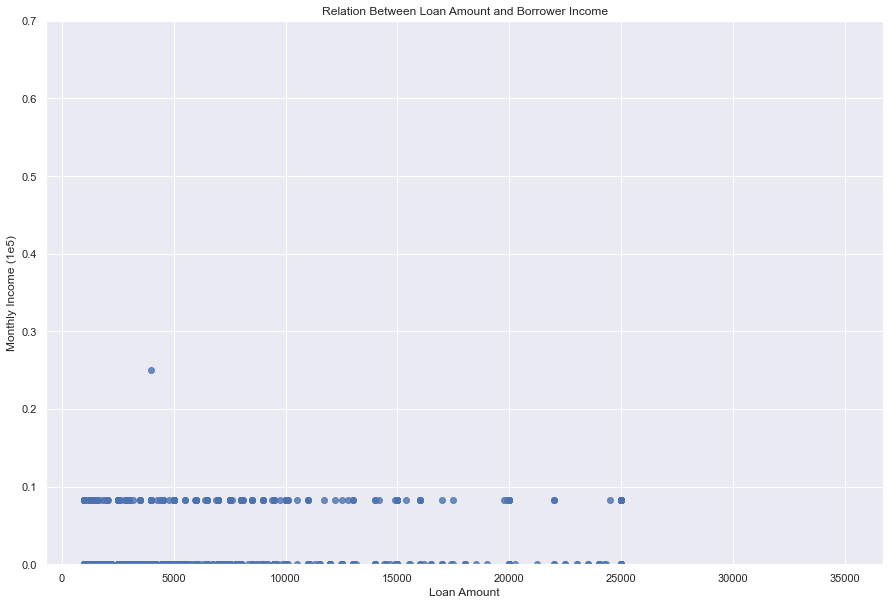

In [28]:
# scale? 
sb.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', truncate=False, x_jitter=0.3)
plt.ylim(0, 0.7)
plt.title('Relation Between Loan Amount and Borrower Income')
plt.xlabel('Loan Amount')
plt.ylabel('Monthly Income (1e5)');

> After employ transparency and jitter for previous chart to make the scatter plot more informative. Used jitter to move the position of each point slightly from its true value.

In [29]:
df_loan.corr()

,ListingNumber,Term,ListingCategory,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount
ListingNumber,1.000000,0.320191,0.128971,0.157983,0.077888,-0.023370,0.076209,0.339750
Term,0.320191,1.000000,0.005479,0.083015,0.085354,0.040477,0.028531,0.339283
ListingCategory,0.128971,0.005479,1.000000,-0.004853,-0.037918,-0.044109,0.001372,-0.127143
EmploymentStatusDuration,0.157983,0.083015,-0.004853,1.000000,0.171195,0.029930,0.069894,0.098219
IsBorrowerHomeowner,0.077888,0.085354,-0.037918,0.171195,1.000000,0.064165,0.140131,0.206859
IncomeVerifiable,-0.023370,0.040477,-0.044109,0.029930,0.064165,1.000000,0.022978,0.056994
StatedMonthlyIncome,0.076209,0.028531,0.001372,0.069894,0.140131,0.022978,1.000000,0.200627
LoanOriginalAmount,0.339750,0.339283,-0.127143,0.098219,0.206859,0.056994,0.200627,1.000000


> Regarding to the correlation coefficient between loan amount and monthly income which is equal to 0.2, there is positive and weak relationship.

In [30]:
# number of borrowers they have loan duration is more than their employment duration
len(df_loan[df_loan.Term > df_loan.EmploymentStatusDuration]) 

36536

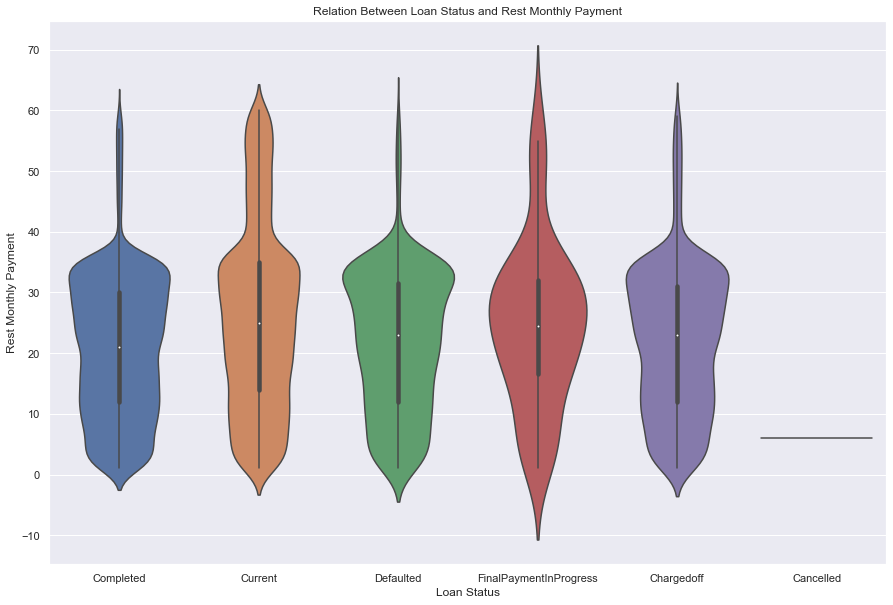

In [31]:
# make loan status ordered
loan_status = ['Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'Chargedoff', 'Cancelled']
lstatus = pd.api.types.CategoricalDtype(ordered=True, categories=loan_status)

# taking the borrowers they have loan duration more than their employment duration 
emp = df_loan.loc[(df_loan.EmploymentStatusDuration < df_loan.Term),['EmploymentStatusDuration', 'Term', 'LoanStatus']].copy()
# the rest loan months after employment contract ended = the loan months - the rest months in employment
emp['EmploymentRest'] = emp['Term'] - emp['EmploymentStatusDuration']
emp['Lstatus'] = df_loan['LoanStatus'].astype(lstatus);


# relation between the employment contract duration < loan duration .. Is affect on loan status?
sb.violinplot(data= emp, x='Lstatus', y= 'EmploymentRest')
plt.title('Relation Between Loan Status and Rest Monthly Payment')
plt.xlabel('Loan Status')
plt.ylabel('Rest Monthly Payment');

> Most of loan status either completed, current or in final payment progress, that's safe. There is rare to convert to cancelled status.

**Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?** <br>
The relation between loan amount and monthly income paymemnt is weak! that lead me to allowing any borrower to make any loan amount regardless income, if qualify other features. I thought that was a stronge relation between them, if the loan amount was a big that's mean the monthly payment also more. 

**Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?** <br>
There are amount number of borrowers (36536) they have loan duration is more than their employment duration, they may causing kind of risk. Surely, there is should be other features have guarntees to relieve from this risk.

<a id='multi'></a>
## Multivariate Exploration

The section contains creating effective multivariate exploration for dataset.

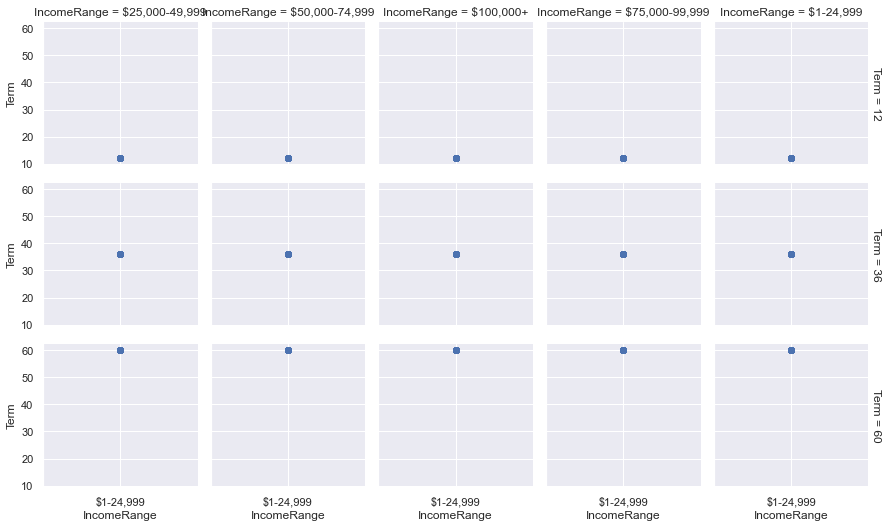

In [32]:
# take the data with income range
income_range = df_loan.loc[df_loan['IncomeRange'].isin(['$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+'])].copy()

# relation between income range and the payment months of loan
g = sb.FacetGrid(data = income_range, col = 'IncomeRange', row = 'Term', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'IncomeRange', 'Term');

In [33]:
# Are the prospers loans make borrower more commitment to pay on time without late?
# let's show if there a relation..
df_prosloan.groupby('TotalProsperLoans')[['OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate']].sum()

,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate
TotalProsperLoans,,,
0.0,0.0,0.0,0.0
1.0,219842.0,6771.0,542.0
2.0,156859.0,4049.0,318.0
3.0,75895.0,1813.0,147.0
4.0,26747.0,624.0,40.0
5.0,6731.0,153.0,4.0
6.0,1671.0,36.0,6.0
7.0,422.0,25.0,4.0
8.0,37.0,1.0,2.0


In [34]:
# re-arrange the data
pros_loan = {'#ofLoans': [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8],
                              'Total': [219842, 156859, 75895,  26747,6731, 1671, 422, 37, 6771, 4049, 1813, 624, 153, 36, 25, 1, 542, 318, 147, 40, 4, 6, 4, 2],
                             'PaymentStatus': ['on time', 'on time', 'on time', 'on time', 'on time', 'on time', 'on time', 'on time',
                                       'less month late', 'less month late','less month late','less month late','less month late','less month late','less month late','less month late',
                                       'plus month late', 'plus month late','plus month late','plus month late','plus month late','plus month late','plus month late','plus month late']}
total_pros_loan = pd.DataFrame(pros_loan)
total_pros_loan.head()

,#ofLoans,Total,PaymentStatus
0,1,219842,on time
1,1,156859,on time
2,1,75895,on time
3,2,26747,on time
4,2,6731,on time


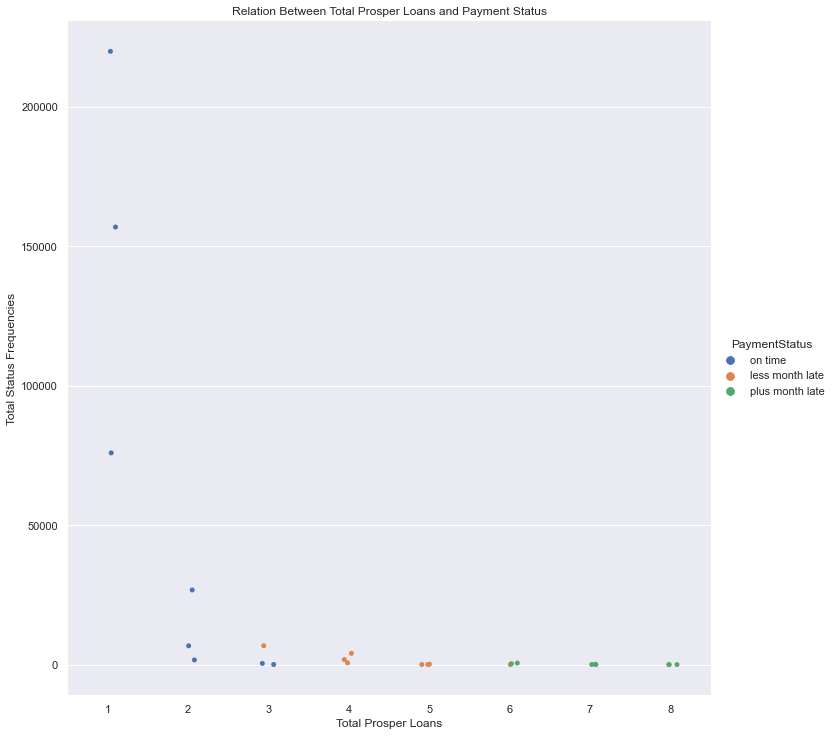

In [35]:
# display the relation between number of prosper loans vs. (payment on time, late < month and late > month).. 
sb.catplot(data=total_pros_loan, x='#ofLoans', y='Total', hue='PaymentStatus', height=10);
plt.title('Relation Between Total Prosper Loans and Payment Status')
plt.xlabel('Total Prosper Loans')
plt.ylabel('Total Status Frequencies');

> The plot representing while the prosper loans was a lot that will lead to late occurring in payment.

**Were there any interesting or surprising interactions between features?** <br>
The surprise is for each borrowe other loan, the payment status is tend to late within a month and plus a month ,respectivly. I thought the commitment level was will greater not lower!
May the graet numbers of loans is affect on borrower's income and cuase some financial hardship.

<a id='con'></a>
## Conclusion

The conclusion of the investigation clarifies that the most exist loans status are current, and completed. Regarding loans categories, loans are for debt consolidation, auto, home improvement, respectively. For borrowers state, CA is got the most loans proportion by 13% followed by TX, FL and NY equally by 6%. For the borrower's occupation, professional has got the most numbers of loans followed by computer programmer and executive. <br>
Also, the conclusion that there is 50.5% of borrowers they owner home while there is 49.5% of them they didn't own. Additionally, the range of most loans amount is between 5000 and 15000. <br>
Also, there is a positive and weak relationship between the loan amount and the borrower income.  Finally, if the prosper loans was a lot, that will lead to late occurring in payment, either in less than a month or plus a month.